<a href="https://colab.research.google.com/github/quickgrid/CodeLab/blob/master/computer_vision/Mediapipe_Python_Holistic_and_Face_Mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Yann_LeCun_-_2018_%28cropped%29.jpg/800px-Yann_LeCun_-_2018_%28cropped%29.jpg' -O 'img.jpg'

--2021-04-21 07:42:03--  https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Yann_LeCun_-_2018_%28cropped%29.jpg/800px-Yann_LeCun_-_2018_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167047 (163K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>] 163.13K  --.-KB/s    in 0.006s  

2021-04-21 07:42:04 (27.0 MB/s) - ‘img.jpg’ saved [167047/167047]



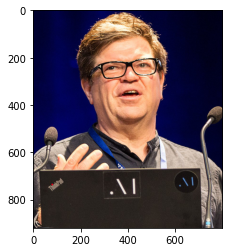

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('img.jpg')
plt.imshow(im)

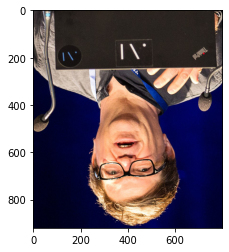

In [3]:
im2 = im.rotate(180)
plt.imshow(im2)
im2.save('img2.jpg')

In [4]:
!pip install mediapipe

     |████████████████████████████████| 47.4MB 82kB/s 


In [5]:
from google.colab.patches import cv2_imshow

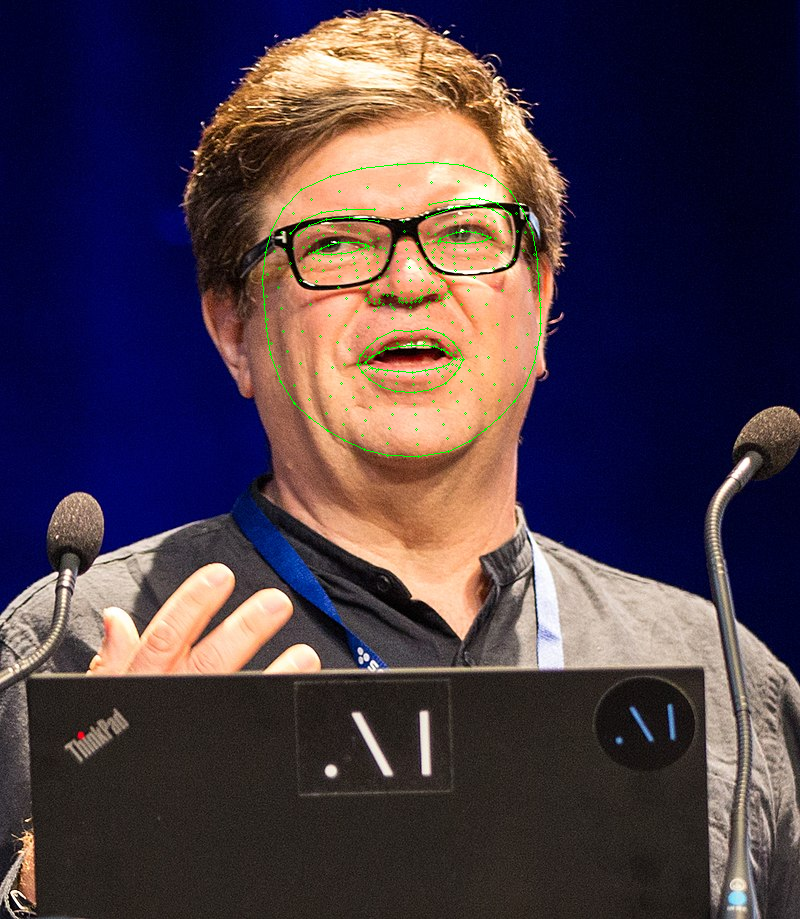

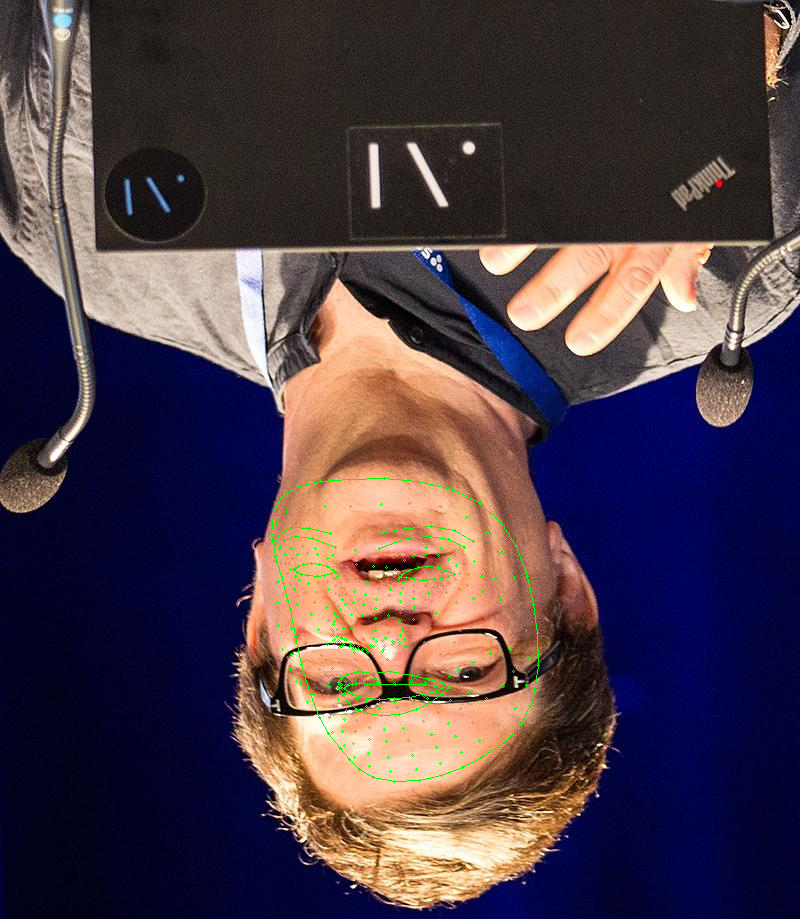

In [6]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

import glob
file_list = glob.glob('*.jpg')

# For static images:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(file_list):
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      #print('face_landmarks:', face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACE_CONNECTIONS,
          landmark_drawing_spec=drawing_spec,
          connection_drawing_spec=drawing_spec)
    #cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

    cv2_imshow(annotated_image)

Nose coordinates: (409.5733642578125, 302.82015866041183)


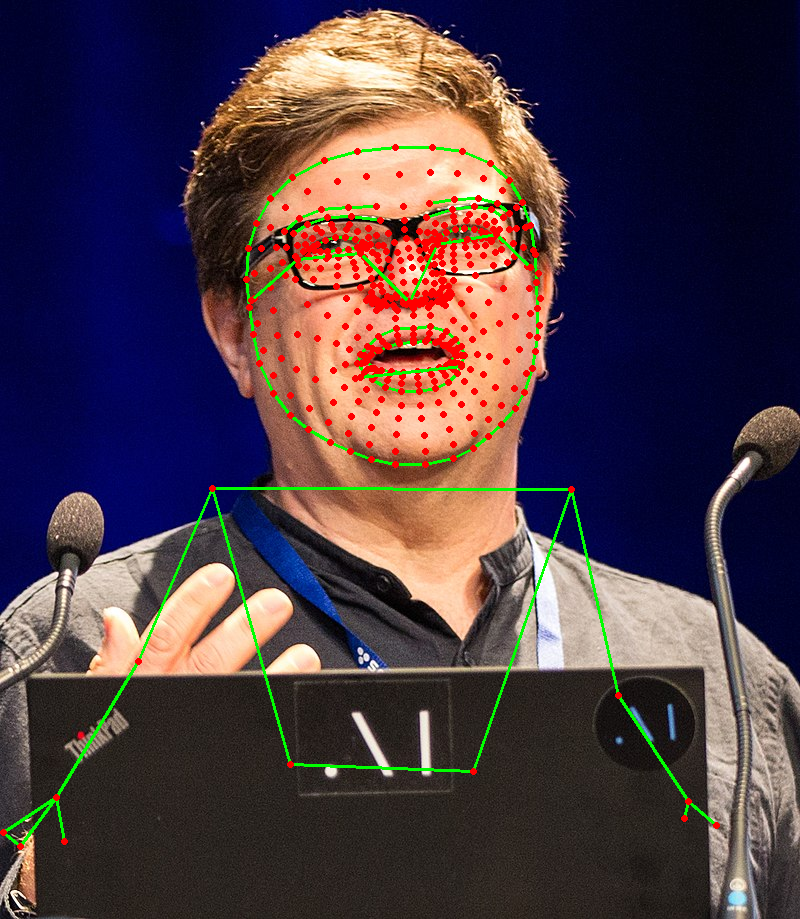

Nose coordinates: (380.77263832092285, 621.4808534383774)


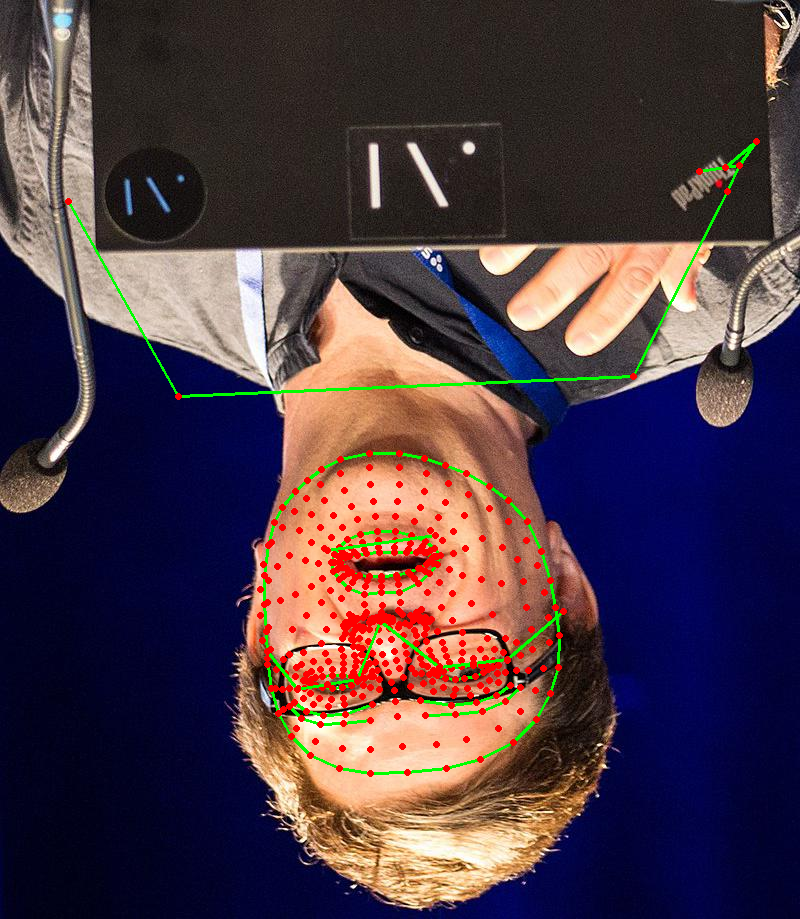

In [7]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

import glob
file_list = glob.glob('*.jpg')

# For static images:
with mp_holistic.Holistic(static_image_mode=True) as holistic:
  for idx, file in enumerate(file_list):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if results.pose_landmarks:
      print(
          f'Nose coordinates: ('
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})'
      )
    # Draw pose, left and right hands, and face landmarks on the image.
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(
        annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    # Use mp_holistic.UPPER_BODY_POSE_CONNECTIONS for drawing below when
    # upper_body_only is set to True.
    mp_drawing.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    #cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

    cv2_imshow(annotated_image)
    